In [1]:
from langchain_google_genai import ChatGoogleGenerativeAI
from langgraph.graph import StateGraph, START, END, MessagesState
from langgraph.prebuilt import ToolNode, tools_condition
from dotenv import load_dotenv

load_dotenv()

True

In [2]:
from langchain_tavily import TavilySearch
tavily_search_tool = TavilySearch(
    max_results=3,
    topic="general",
)

tavily_search_tool.invoke({"query": "What happened at the last wimbledon"})

{'query': 'What happened at the last wimbledon',
 'follow_up_questions': None,
 'answer': None,
 'images': [],
 'results': [{'url': 'https://www.nytimes.com/athletic/6477884/2025/07/07/wimbledon-recap-tennis-results-news-day-8/',
   'title': 'Wimbledon recap: Unexpected injury retirements all over the All ...',
   'content': 'Sinner Wins Wimbledon Title Novak Djokovic and Alex de Minaur played an 18-minute game with Djokovic serving at 1-0 in the second set, Belinda Bencic and Ekaterina Alexandrova played a 15-minute one with Bencic serving for the match at 7-6, 5-3. Alexandrova would miss on that point and then need to earn another with a forehand winner before finally getting the game on a Bencic error on the 22nd point. Mayor of London Sadiq Khan is “extremely frustrated,” a spokesperson for City Hall told *The Athletic*, and passengers heading in the direction of the All England Club via Southfields, Wimbledon Park or Wimbledon stations feel the same. Pavlyuchenkova is in her secon

In [3]:
tools=[tavily_search_tool]

In [4]:
system_prompt = (
    "You are a knowledgeable and helpful assistant. "
    "Answer the user's question using your own understanding. "
    "If needed, you may also use the available tools to provide a more accurate or detailed response."
)

In [5]:
model=ChatGoogleGenerativeAI(model="gemini-2.0-flash")
model_with_tools=model.bind_tools(tools)

In [6]:
def agent_function(state: MessagesState):
    """Agent Function"""
    user_question = state["messages"] 
    input_question = [system_prompt] + user_question  
    response = model_with_tools.invoke(input_question)

    return {"messages": [response]}

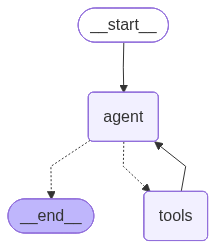

In [7]:
graph_builder= StateGraph(MessagesState)
graph_builder.add_node("agent", agent_function)
graph_builder.add_node("tools", ToolNode(tools=tools))
graph_builder.add_edge(START,"agent")
graph_builder.add_conditional_edges("agent",tools_condition)
graph_builder.add_edge("tools","agent")
graph_builder.add_edge("agent",END)
graph = graph_builder.compile()

graph

In [8]:
response = graph.invoke({"messages": ["what are black holes?"]})
print(response)

{'messages': [HumanMessage(content='what are black holes?', additional_kwargs={}, response_metadata={}, id='de1bad06-9b24-4e0e-b361-5571511ce112'), AIMessage(content='Black holes are fascinating and mysterious objects in space. Here\'s a breakdown of what they are:\n\n*   **Formation:** They\'re typically formed when massive stars die. When a star runs out of fuel, it can collapse in on itself. If the star is massive enough, this collapse results in a black hole.\n*   **Gravity:** Black holes have incredibly strong gravity. This gravity is so intense that nothing, not even light, can escape its pull once it crosses a boundary called the event horizon.\n*   **Event Horizon:** The event horizon is the "point of no return." Anything that crosses this boundary is trapped within the black hole.\n*   **Singularity:** At the center of a black hole is a point called the singularity, where matter is crushed to an infinitely small density.\n*   **Detection:** Since light can\'t escape, we can\'t

In [9]:
response['messages'][-1].content

'Black holes are fascinating and mysterious objects in space. Here\'s a breakdown of what they are:\n\n*   **Formation:** They\'re typically formed when massive stars die. When a star runs out of fuel, it can collapse in on itself. If the star is massive enough, this collapse results in a black hole.\n*   **Gravity:** Black holes have incredibly strong gravity. This gravity is so intense that nothing, not even light, can escape its pull once it crosses a boundary called the event horizon.\n*   **Event Horizon:** The event horizon is the "point of no return." Anything that crosses this boundary is trapped within the black hole.\n*   **Singularity:** At the center of a black hole is a point called the singularity, where matter is crushed to an infinitely small density.\n*   **Detection:** Since light can\'t escape, we can\'t directly *see* a black hole. However, we can detect them by observing their effects on surrounding matter. For example, if a black hole is near a star, it can pull m

In [11]:
from langchain_google_genai import ChatGoogleGenerativeAI
from langchain_core.messages import HumanMessage
from langgraph.graph import StateGraph, START, END, MessagesState
from langchain_core.prompts import ChatPromptTemplate
from langgraph.prebuilt import ToolNode, tools_condition
from langchain_tavily import TavilySearch
from dotenv import load_dotenv

load_dotenv()

resume = """
TASHIF AHMAD KHAN
LinkedIn: https://www.linkedin.com/in/tashif-ahmad-khan-982304244/ | GitHub: https://github.com/tashifkhan | Portfolio: https://portfolio.tashif.codes

SKILLS
* Programming Languages: Python, JavaScript, Go
* Frameworks & Libraries: Next.js, React.js, React Native, Node.js, Astro, Express.js, Flask, FastAPI, Redux Toolkit, LangChain, LangGraph, Framer Motion
* Databases: MySQL, MongoDB, PostgreSQL, FAISS, ChromaDB, SQLite
* Tools & Platforms: Git/GitHub, Docker, Docker Compose, Vercel, Pyodide, Tailscale, Nginx Proxy Manager, Browser WebExtension APIs
* Systems & Networking: System Administration, Network Configuration, VPN
* Additional Skills: UI/UX Design, Technical Content Writing, Data Analysis (MS Excel), Presentation Design (MS PowerPoint)
* Soft Skills: Leadership, Public Relations, Debating & Public Speaking, Event & Financial Management

EXPERIENCE
* UNICLOUD | Software Development Intern (June - July 2026) | https://drive.tashif.codes/s/RsaiDWGCEoXjt2K
    * Engineered and deployed 3 critical React modules (video-tracking, shapefile download, and block change/edit page) for a high-profile IRCTC project (https://irgvap.ircep.gov.in), significantly enhancing vendor progress monitoring and data visualization capabilities.
    * Developed robust NestJS REST APIs, securing data transactions with JWT authentication and optimizing CRUD operations with PostgreSQL, thereby powering dynamic front-end functionalities.
    * Automated and improved Database Migration Cron jobs to dispatch real-time Block Change Alerts to approvers via SMTP mail server and browser webpush notifications, improving project oversight and ensuring timely responses.

NOTABLE PROJECTS
* FindexAI — AI-Powered Browser Discovery Engine | Next.js, React, FastAPI, LangChain, LangGraph, FAISS, ChromaDB, Docker, WebExtension APIs
    [Live](https://findex.tashif.codes) | [GitHub](https://github.com/tashifkhan/findex)
    * Pioneered FindexAI, an AI-powered browser extension transforming conventional browser search into a sophisticated discovery engine for web content and YouTube, significantly enhancing information retrieval and contextual understanding.
    * Developed a multi-agent architecture utilizing LangChain and LangGraph to orchestrate specialized agents for real-time web search (SearchXNG), YouTube transcript analysis, and intelligent HTML page querying.
    * Implemented advanced vector-based similarity search with FAISS and ChromaDB for lightning-fast retrieval of indexed content, enabling semantic search capabilities beyond keyword matching.
    * Engineered a model-agnostic FastAPI backend and a responsive React browser extension (Chrome & Firefox), demonstrating full-stack development proficiency and a highly modular, extensible system design.
    * Designed and integrated a customizable theme engine (including MacOS Classic, Windows XP, Neobrutal), enhancing user experience and personalizing the search interface.

* TalentSync AI | Next.js, TypeScript, FastAPI, LangChain, LangGraph, PostgreSQL, Docker
    [Live](https://talentsync.tashif.codes/) | [GitHub](https://github.com/harleenkaur28/AI-Resume-Parser)
    * Pioneered an AI-driven Next.js platform for comprehensive resume analysis, job category prediction, and efficient talent management, featuring a pre-vetted dashboard for employers.
    * Engineered advanced capabilities using LangChain, RAG and LangGraph to dynamically prepare personalized cold emails, generate targeted interview questions, and craft compelling answer frameworks, significantly enhancing recruitment efficiency.
    * Utilized intelligent parsing to extract key insights from complex resume data, ensuring highly accurate job category predictions and comprehensive candidate profiling.
    * Developed a scalable Python (FastAPI) backend with PostgreSQL, ensuring robust data management, and containerized the application using Docker for streamlined deployment.

* Home Lab Automation & Media Server | Docker, Docker Compose, Linux, Bash
    * Architected and deployed a robust self-hosted home lab encompassing 10+ Dockerized services, including Nextcloud for personal cloud storage, Jellyfin for media streaming, and a full "Arr" stack for automated content management.
    * Engineered a secure remote access solution by configuring a Tailscale VPN tunnel to a VPS, enabling public accessibility without a static IP, and implementing Nginx Proxy Manager for efficient reverse proxy and SSL termination.
    * Automated media acquisition and organization through the integrated "Arr" stack (Prowlarr, Sonarr, Radarr, Lidarr, Readarr, Homarr) paired with qBittorrent, creating a seamless, centralized entertainment and data ecosystem.
    * Managed and optimized containerized environments and network configurations, demonstrating strong capabilities in system administration, network engineering, and infrastructure deployment.

* JPortal | React, Python, WASM (Pyodide), MongoDB (4.5k + users)
    [Live](https://jportal.tashif.codes) | [GitHub](https://github.com/tashifkhan/jportal)
    * Developed a modern React Progressive Web App (PWA) to serve as an intuitive and customizable frontend for the JIIT WebKiosk Webportal, attracting over 4,500 users.
    * Integrated Pyodide to enable efficient parsing and display of marks PDF data directly on the frontend, significantly improving user experience.
    * Implemented a sophisticated theming system and customizability options, ensuring a responsive and optimized experience across both mobile and desktop devices.
    * Incorporated critical features including the JIIT Timetable (https://jiit-timetable.tashif.codes/), Placement (https://github.com/tashifkhan/placement-alerts-superset-telegram-notification-bot), and Campus Updates (https://jiit-updates.tashif.codes/), centralizing key information for students.

* SolarHelper | React, TypeScript, FastAPI, PWA, RAG - Langchain, Vector DB, LightGBM
    [Live](https://solar-helper.tashif.codes/) | [GitHub](https://github.com/tashifkhan/SolarHelper)
    * Built a React PWA delivering personalized solar sizing, cost projections, and savings forecasts, empowering users with data-driven insights.
    * Deployed an AI chatbot utilizing LangChain, Gemini, and RAG for instant, accurate guidance on solar subsidies and policies, enhancing user support.
    * Utilized LightGBM to generate precise monthly solar yield forecasts based on local weather data, optimizing energy predictions.
    * Constructed a robust FastAPI backend for efficient web scraping, vector embeddings, LLM integration, and real-time tariff/weather feed processing.

* BiasDetector | Next.js, TypeScript, Flask, MongoDB, JWT, XgBoost
    [Live](https://bias-detector.tashif.codes/) | [GitHub](https://github.com/tashifkhan/News-Bias-Detector)
    * Created a Next.js application in TypeScript for real-time detection of bias in news articles, storing comprehensive data in MongoDB.
    * Designed and implemented a sophisticated web scraping pipeline to aggregate news content from diverse sources, ensuring a rich dataset for analysis.
    * Integrated an XgBoost ML Model to accurately identify bias patterns and provide actionable insights, enhancing user comprehension of media objectivity.
    * Crafted a sleek and intuitive frontend, ensuring seamless user interaction and easy access to bias detection results.

* Designique | Next.js, TypeScript, Node.js, MongoDB, JWT, WebSockets, Gemini Gen AI API
    [Live](https://designique.tashif.codes/) | [GitHub](https://github.com/tashifkhan/Designique-rideHack24)
    * Developed a comprehensive Next.js application designed to foster direct connections between designers, manufacturers, and consumers, facilitating a unique marketplace experience.
    * Engineered a full-featured e-commerce portal, including robust marketplace functionalities, powered by MongoDB for efficient data management.
    * Implemented anonymous real-time chatting capabilities between manufacturers and designers using WebSockets, enhancing collaboration and communication.
    * Integrated Gemini's Generative AI API to power an intelligent support chat, streamlining customer query resolution and improving user satisfaction.

* CropMate | Next.js, TypeScript, Flask, JWT, Gemini Gen AI API, Random Forest KNN
    [Live](https://cropmate.tashif.codes/) | [GitHub](https://github.com/tashifkhan/crop-mate)
    * Built a Next.js application offering AI-driven crop recommendations, accurate yield predictions, and personalized insurance advisories for farmers.
    * Developed an AI-powered chatbot using Gemini's Generative AI API, providing real-time support and instant answers to agricultural queries.
    * Utilized Random Forest KNN algorithms to ensure highly accurate crop and yield predictions, optimizing agricultural planning.
    * Designed a sleek, farmer-friendly interface with Framer Motion animations, enhancing usability and engagement.
    * Constructed a robust Flask backend for seamless ML model integration and comprehensive weather-based risk analysis, providing crucial insights.

"""

company_name = "Nike" 
company_website="https://nike.com"

import requests
import json
import re

def return_markdown(url: str) -> str:
    """Fetches the markdown content from a given URL using the Jina AI service."""
    jina_url = "https://r.jina.ai/" + url
    print(f"Fetching markdown for URL: {url}")
    print(f"Using Jina AI endpoint: {jina_url}")

    try:
        res = requests.get(jina_url)
        return res.text

    except Exception as e:
        return f"Error fetching content from {url}: {str(e)}"
    

company_website_content = return_markdown(company_website)

job = "Software Engineer"

jd = """
Software Engineer I - Reliability Engineering , ITC

Position Type
    Full Time
Career area
    Software Engineering
Location
    4/F, WeWork, Embassy GolfLinks, Karnataka, Karnataka 560093, India
Job ID
    R-68795




Become a Part of the NIKE, Inc. Team

NIKE, Inc. does more than outfit the world’s best athletes. It is a place to explore potential, obliterate boundaries and push out the edges of what can be. The company looks for people who can grow, think, dream and create. Its culture thrives by embracing diversity and rewarding imagination. The brand seeks achievers, leaders and visionaries. At NIKE, Inc. it’s about each person bringing skills and passion to a challenging and constantly evolving game.
Site Reliability Engineer I

India Technology Center
WHO YOU’LL WORK WITH

As a Software Engineer specializing in Resilience Engineering, you will play a critical role in ensuring the maximum availability, observability, reliability, security, and performance of Nike’s digital experiences. This position requires a proactive approach to maintaining robust, consumer-facing systems that support millions of users worldwide.

In this role, you will focus on in-depth problem analysis, identify infrastructure and code-level defects, establish observability processes for key performance indicators (KPIs), and collaborate closely with product delivery teams to design sustainable solutions to production challenges. Your expertise will be vital to enhancing Nike’s commitment to a seamless and resilient digital experience.
WHO WE ARE LOOKING FOR

Nike is seeking talented and driven full stack developers with expertise in cloud infrastructure and services. The ideal candidate will possess:

    A Bachelor’s degree in Computer Science, Information Systems, or a related field

    Alternatively, 1-3 years of relevant professional experience in lieu of a degree will be considered

    Proven experience in designing and developing applications using Java, Node.js, or similar languages

    Familiarity with front-end frameworks (e.g., React, Angular) is advantageous

    Experience with modern programming languages such as Scala, Python, or Golang is preferred

    A solid understanding of DNS, networking, virtualization, and Linux operating systems

    Demonstrated expertise in building and managing scalable, cloud-based microservices, ideally on AWS

    Experience with Docker or serverless architectures

    Proficiency in at least one NoSQL database (e.g., DynamoDB, Cassandra)

    Strong understanding of RESTful APIs

    Familiarity with service management, agile, and observability tools such as ServiceNow, Jira, Jenkins, Splunk, New Relic, and SignalFX

WHAT YOU’LL WORK ON

    Observing, diagnosing, and quickly resolving production issues with precision to minimize service interruptions

    Developing and implementing real-time monitoring solutions that deliver essential insights into system health and key performance indicators

    Communicating technical issues and their business impacts clearly, ensuring alignment across teams and effective response strategies

    Reporting high-value metrics and insights to leadership, demonstrating the impact of site reliability on consumer experience and overall business objectives

    Managing IT service processes such as Incident, Problem, Change, and Knowledge Management to maintain service quality and reliability

    Collaborating closely with both business and technical teams to analyze system performance, troubleshoot consumer-reported issues, and proactively optimize system efficiency

    Leading initiatives to enhance application reliability for high-demand consumer web and mobile platforms, ensuring consistent performance

    Leveraging negotiation and influence to foster alignment and drive collaborative solutions across multiple teams

    Promoting a culture of growth by coaching, mentoring, and sharing knowledge, supporting continuous improvement and resilience across the team

Join us in delivering resilient, high-performance digital solutions that will empower millions of consumers around the world. Your skills and insights will be pivotal in driving Nike’s digital transformation.

NIKE, Inc. is a growth company that looks for team members to grow with it. Nike offers a generous total rewards package, casual work environment, a diverse and inclusive culture, and an electric atmosphere for professional development. No matter the location, or the role, every Nike employee shares one galvanizing mission: To bring inspiration and innovation to every athlete* in the world.

NIKE, Inc. is an equal opportunity employer. Qualified applicants will receive consideration without regard to race, color, religion, sex, national origin, age, sexual orientation, gender identity, gender expression, veteran status, or disability.
"""

prompt = ChatPromptTemplate.from_template(
    """
    You are a resume expert. The ML model predicted the job of {job} at {company_name}.
    Given the resume below, the company's website content, and the job description, highlight and improve the resume's impact and tailor it for this role.
    Use the given tools to search for relevant details and to align the resume with the company's products, tech stack, and values.

    Company: {company_name}

    Company website content:
    {company_website_content}

    Job description:
    {jd}

    Resume:
    {resume}


    just give the new generated resume without any explanation or additional information.
    """,
).partial(
    company_name=company_name,
    company_website_content=company_website_content,
    jd=jd,
)

tavily_search_tool = TavilySearch(
    max_results=3,
    topic="general",
)

class GraphBuilder():
    def __init__(self, resume_text, job_role):
        self.llm = ChatGoogleGenerativeAI(model="gemini-2.0-flash")
        self.tools = [tavily_search_tool]
        self.llm_with_tools = self.llm.bind_tools(tools=self.tools)
        self.graph = None
        self.system_prompt = prompt.format_messages(resume=resume_text, job=job_role)

    def agent_function(self, state: MessagesState):
        user_question = state["messages"]
        input_question = [*self.system_prompt] + user_question
        response = self.llm_with_tools.invoke(input_question)
        return {"messages": [response]}

    def build_graph(self):
        graph_builder = StateGraph(MessagesState)
        graph_builder.add_node("agent", self.agent_function)
        graph_builder.add_node("tools", ToolNode(tools=self.tools))
        graph_builder.add_edge(START, "agent")
        graph_builder.add_conditional_edges("agent", tools_condition)
        graph_builder.add_edge("tools", "agent")
        graph_builder.add_edge("agent", END)
        self.graph = graph_builder.compile()
        return self.graph

    def __call__(self):
        return self.build_graph()

def return_resume(resume, job):
    obj = GraphBuilder(resume_text=resume, job_role=job)
    graph = obj()

    json_instruction = (
        "Return only a single valid JSON object (no extra text). "
        "The JSON must match the ComprehensiveAnalysisData Pydantic model defined in app/models/schemas.py. "
        "Specifically include the following top-level keys (use these exact names):\n"
        "- skills_analysis: array of objects with keys 'skill_name' (string) and 'percentage' (int)\n"
        "- recommended_roles: array of strings\n"
        "- languages: array of objects with key 'language' (string)\n"
        "- education: array of objects with key 'education_detail' (string)\n"
        "- work_experience: array of objects each with 'role' (string), 'company_and_duration' (string), and 'bullet_points' (array of strings)\n"
        "- projects: array of objects with 'title' (string), 'technologies_used' (array of strings), and 'description' (string)\n"
        "- publications: array of objects matching UIPublicationEntry (title, authors, journal_conference, year, doi, url)\n"
        "- positions_of_responsibility: array of objects matching UIPositionOfResponsibilityEntry (title, organization, duration, description)\n"
        "- certifications: array of objects matching UICertificationEntry (name, issuing_organization, issue_date, expiry_date, credential_id, url)\n"
        "- achievements: array of objects matching UIAchievementEntry (title, description, year, category)\n"
        "- name: string or null\n"
        "- email: string or null\n"
        "- contact: string or null\n"
        "- predicted_field: string or null\n"
        "Only include these keys. If a field is empty, return an empty array or null for optional strings. Ensure all strings are properly quoted and the output is strictly valid JSON."
    )

    response = graph.invoke({"messages": [HumanMessage(content=json_instruction)]})
    text = response["messages"][-1].content.strip()

    # Try to extract JSON substring
    start = text.find("{")
    end = text.rfind("}")
    json_text = text[start:end+1] if start != -1 and end != -1 else text

    # Attempt to parse; try simple fixes if necessary
    try:
        parsed = json.loads(json_text)
        return json.dumps(parsed, indent=2)
    except Exception:
        # Try naive fixes: convert single quotes to double quotes and add quotes to keys if missing
        try:
            fixed = json_text.replace("'", '"')
            # add quotes around unquoted keys (basic)
            fixed = re.sub(r'(?<=[\\{\\s,])([A-Za-z0-9_+-]+)\\s*:', r'"\\1":', fixed)
            parsed = json.loads(fixed)
            return json.dumps(parsed, indent=2)
        except Exception:
            return json.dumps({
                "error": "failed to parse model output as JSON",
                "raw": text
            }, indent=2)

print(return_resume(resume, job))

Fetching markdown for URL: https://nike.com
Using Jina AI endpoint: https://r.jina.ai/https://nike.com
{
  "skills_analysis": [
    {
      "skill_name": "Python",
      "percentage": 100
    },
    {
      "skill_name": "JavaScript",
      "percentage": 100
    },
    {
      "skill_name": "Go",
      "percentage": 100
    },
    {
      "skill_name": "Next.js",
      "percentage": 100
    },
    {
      "skill_name": "React.js",
      "percentage": 100
    },
    {
      "skill_name": "React Native",
      "percentage": 100
    },
    {
      "skill_name": "Node.js",
      "percentage": 100
    },
    {
      "skill_name": "Astro",
      "percentage": 100
    },
    {
      "skill_name": "Express.js",
      "percentage": 100
    },
    {
      "skill_name": "Flask",
      "percentage": 100
    },
    {
      "skill_name": "FastAPI",
      "percentage": 100
    },
    {
      "skill_name": "Redux Toolkit",
      "percentage": 100
    },
    {
      "skill_name": "LangChain",
      "pe